### Imports

In [131]:
# Data Manipulation
import pandas as pd
# Data Normalization
from sklearn import preprocessing
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

print("Setup Complete")

Setup Complete


In [132]:
print("Loading Data...")

grad_data = pd.read_csv("./data/graduation_rate.csv")

print("Data Loaded")

Loading Data...
Data Loaded


### Data Preparation

In [133]:
grad_data.head()

,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate
0,22,1625,high school,40999,3.0,3.1,7
1,29,2090,associate's degree,75817,4.0,3.4,5
2,30,2188,bachelor's degree,82888,4.0,3.9,3
3,33,2151,associate's degree,93518,4.0,3.7,5
4,29,2050,associate's degree,79153,4.0,3.4,6


In [134]:
grad_data.dtypes

ACT composite score              int64
SAT total score                  int64
parental level of education     object
parental income                  int64
high school gpa                float64
college gpa                    float64
years to graduate                int64
dtype: object

#### Data has no Missing Values

In [135]:
grad_data.isna().sum()

ACT composite score            0
SAT total score                0
parental level of education    0
parental income                0
high school gpa                0
college gpa                    0
years to graduate              0
dtype: int64

#### Rename Attributes to be more workable

In [136]:
attr_names = {
    "ACT composite score": "ACT",
    "SAT total score": "SAT",
    "parental level of education": "par_education",
    "parental income": "par_income",
    "high school gpa": "hs_gpa",
    "college gpa": "college_gpa",
    "years to graduate": "years_to_grad",
}

grad_data.rename(columns=attr_names, inplace=True)

In [137]:
grad_data.columns

Index(['ACT', 'SAT', 'par_education', 'par_income', 'hs_gpa', 'college_gpa',
       'years_to_grad'],
      dtype='object')

#### Normalize Data

In [138]:
par_edu = grad_data['par_education']
grad_data.drop(columns=['par_education'], inplace=True)

In [139]:
scaled_data = preprocessing.normalize(grad_data.values)
grad_data = pd.DataFrame(scaled_data, columns=grad_data.columns)

grad_data.describe()

,ACT,SAT,par_income,hs_gpa,college_gpa,years_to_grad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.000465,0.032499,0.999404,0.000060,0.000055,0.000084
std,0.000170,0.011601,0.000546,0.000021,0.000018,0.000047
min,0.000225,0.016462,0.993565,0.000031,0.000029,0.000026
25%,0.000355,0.025049,0.999335,0.000047,0.000042,0.000054
50%,0.000421,0.029506,0.999564,0.000055,0.000050,0.000069
75%,0.000523,0.036456,0.999686,0.000068,0.000061,0.000100
max,0.001682,0.113251,0.999864,0.000210,0.000184,0.000420


In [140]:
grad_data['par_education'] = par_edu

In [141]:
grad_data.columns

Index(['ACT', 'SAT', 'par_income', 'hs_gpa', 'college_gpa', 'years_to_grad',
       'par_education'],
      dtype='object')

### Parental Education

In [142]:
par_edu_data = grad_data["par_education"].value_counts()
par_edu_data

some college          232
high school           207
some high school      180
associate's degree    176
bachelor's degree     124
master's degree        81
Name: par_education, dtype: int64

In [143]:
par_edu_data.index[0]

'some college'

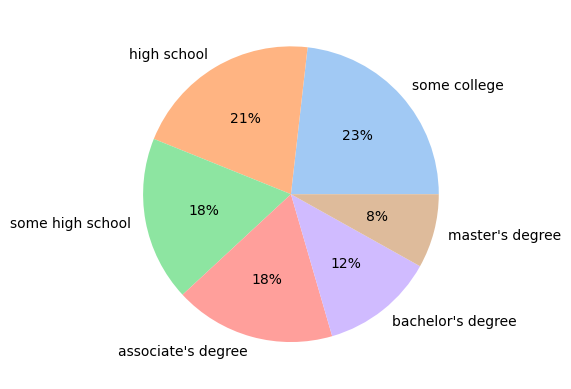

In [144]:
colors = sns.color_palette('pastel')[0:6]

plt.pie(par_edu_data, labels=par_edu_data.index, colors=colors, autopct='%.0f%%')
plt.show()

### Parental Income

In [145]:
grad_data["par_income"].describe()

count    1000.000000
mean        0.999404
std         0.000546
min         0.993565
25%         0.999335
50%         0.999564
75%         0.999686
max         0.999864
Name: par_income, dtype: float64

<AxesSubplot:ylabel='Frequency'>

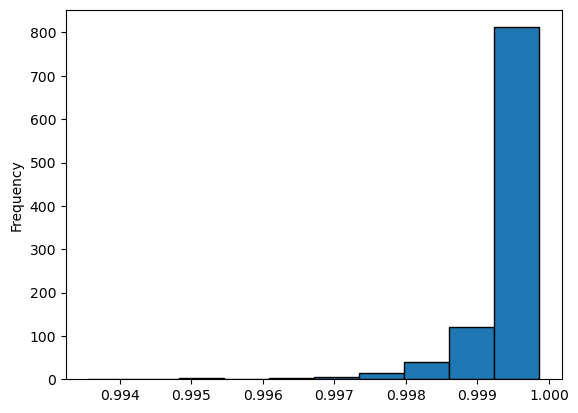

In [146]:
grad_data["par_income"].plot(kind='hist', edgecolor='black')

<AxesSubplot:>

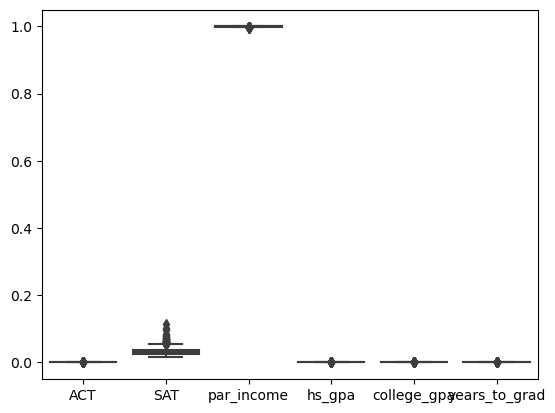

In [147]:
sns.boxplot(data=grad_data)